<a href="https://colab.research.google.com/github/francethyst24/CDMDDA/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
img_path = '/content/drive/MyDrive/Datasets/folfol'
batch_size = 32

In [ ]:
img_data = ImageDataBunch.from_folder(path=img_path, train = '/Train', valid_pct = 0.25, ds_tfms=get_transforms(), size=224, bs=batch_size)

In [ ]:
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2964 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Potato Healthy (121 items),Potato Healthy (121 items),Potato Healthy (121 items),Potato Healthy (121 items),Potato Healthy (121 items)
Path: /content/drive/MyDrive/Datasets/folfol;

Valid: LabelList (988 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato Mosaic Virus,Potato Early Blight,Pepper Bell Healthy,Pepper Bell Healthy,Tomato Mosaic Virus
Path: /content/drive/MyDrive/Datasets/folfol;

Test: None

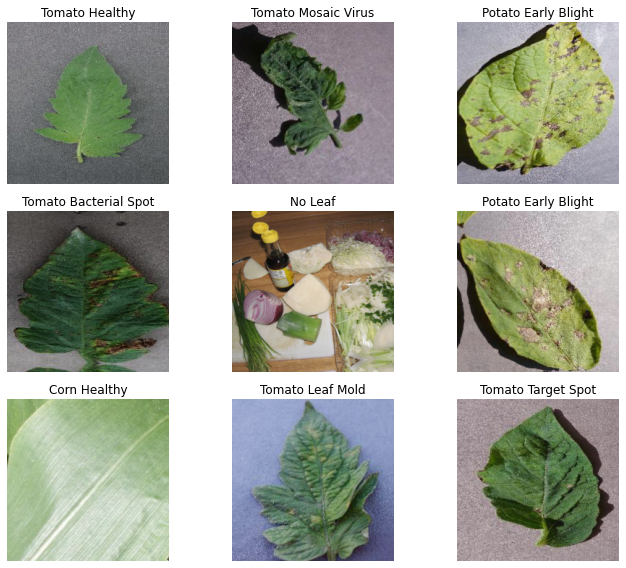

In [ ]:
img_data.show_batch(rows=3, figsize=(10,8))

In [ ]:
img_data.classes

['Corn Cercospora Leaf Spot',
 'Corn Common Rust',
 'Corn Healthy',
 'Corn Northern Leaf Blight',
 'No Leaf',
 'Pepper Bell Bacterial Spot',
 'Pepper Bell Healthy',
 'Potato Early Blight',
 'Potato Healthy (121 items)',
 'Potato Late Blight',
 'Squash Powdery Mildew',
 'Tomato Bacterial Spot',
 'Tomato Early Blight',
 'Tomato Healthy',
 'Tomato Late Blight',
 'Tomato Leaf Mold',
 'Tomato Mosaic Virus',
 'Tomato Septoria Leaf Spot',
 'Tomato Spider Mites Two-Spotted Spider Mite',
 'Tomato Target Spot']

In [ ]:
learn = cnn_learner(img_data, models.resnet34,
        metrics=[accuracy,error_rate,Precision(),Recall(),FBeta()])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,1.781030,0.475808,0.842105,0.157895,0.839540,0.845698,0.842282,14:47
1,0.779741,0.357931,0.888664,0.111336,0.896158,0.884599,0.886887,00:54
2,0.502617,0.288084,0.897773,0.102227,0.902980,0.900520,0.901010,00:52
3,0.346318,0.234447,0.921053,0.078947,0.922782,0.921025,0.921376,00:51
4,0.297950,0.227304,0.925101,0.074899,0.926180,0.924966,0.925208,00:51


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,0.353520,0.296394,0.907895,0.092105,0.910241,0.906989,0.905781,00:50
1,0.314825,0.219842,0.921053,0.078947,0.922599,0.922052,0.922161,00:50


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.save('/content/drive/MyDrive/Datasets/folfol/model/DL1')

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

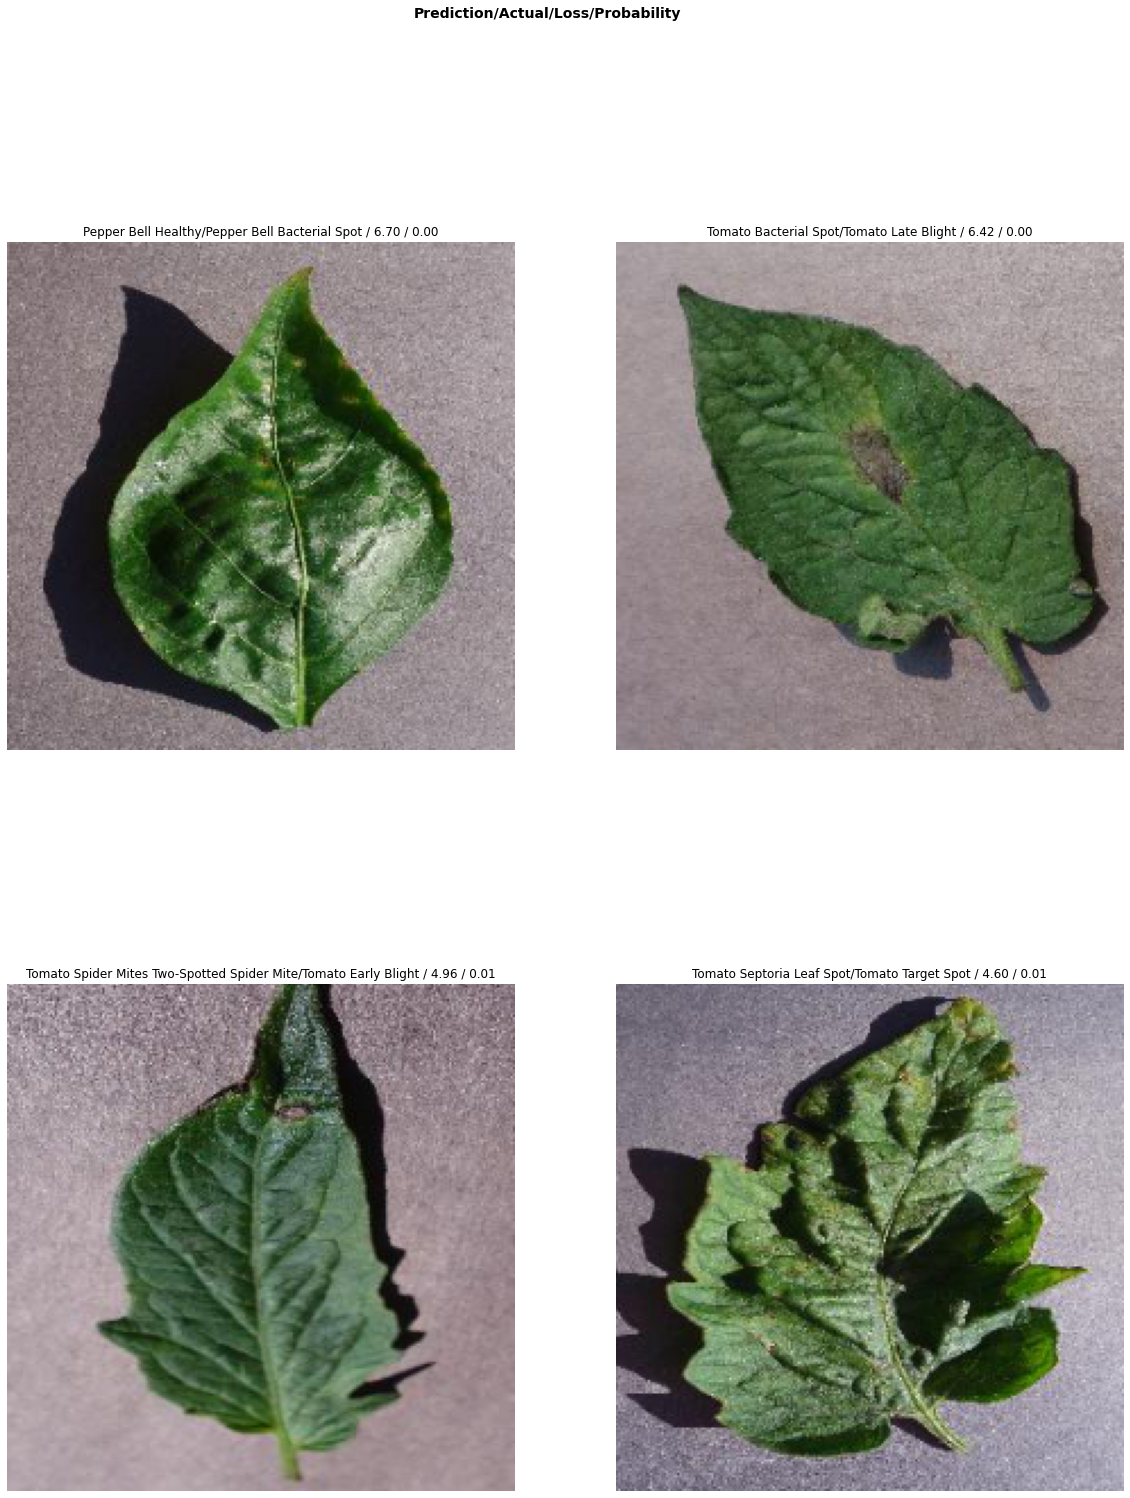

In [ ]:
interpret.plot_top_losses(4, figsize=(20, 25))

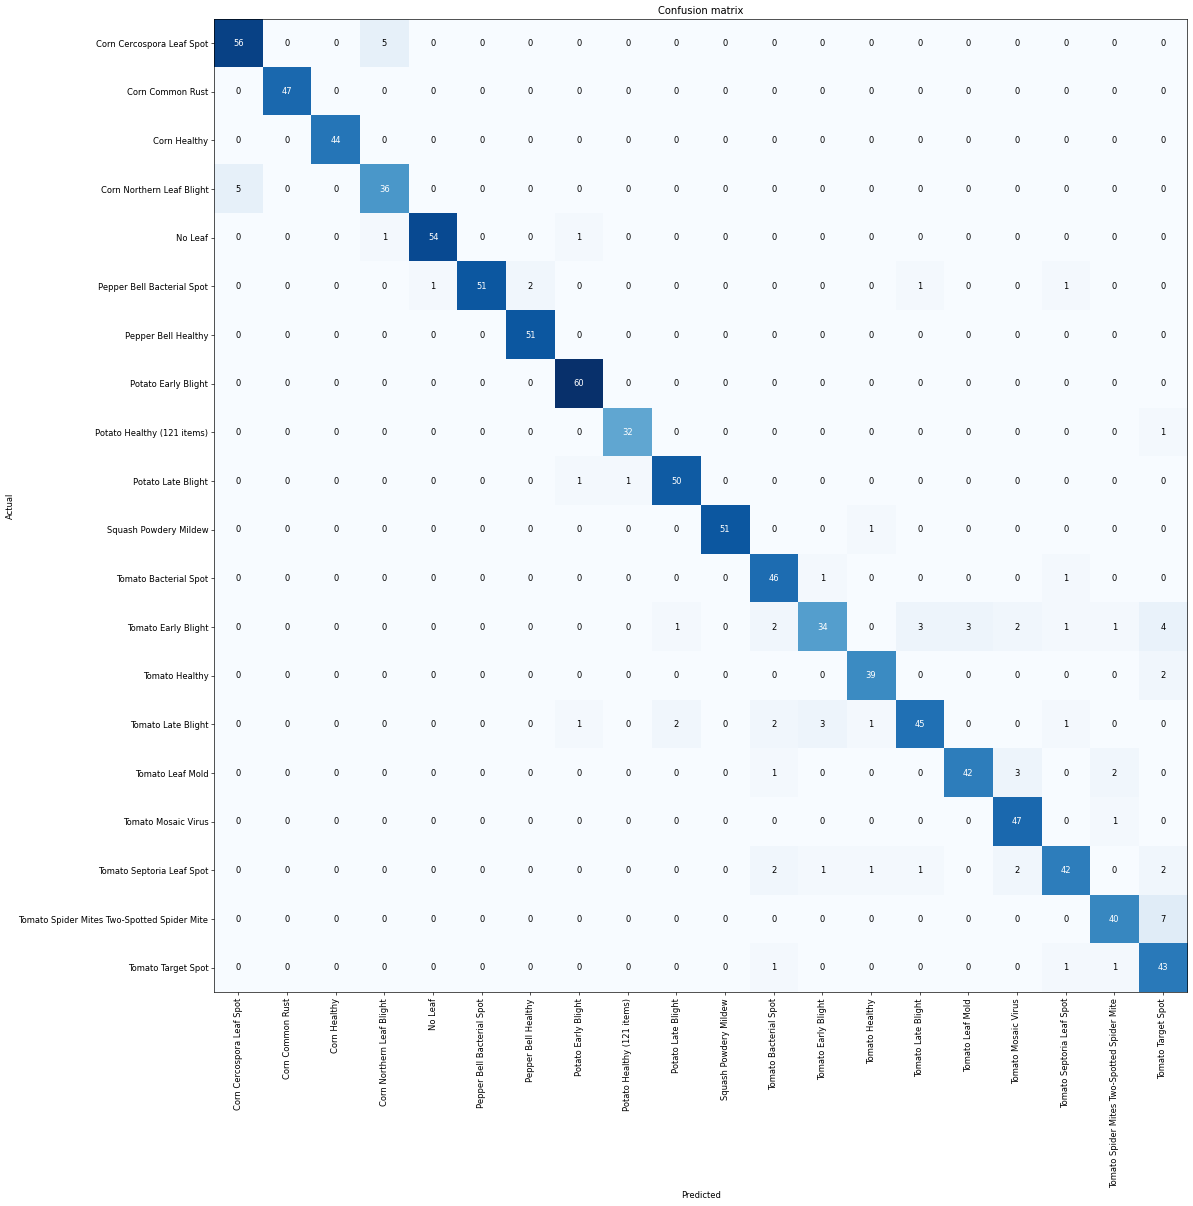

In [ ]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.unfreeze()

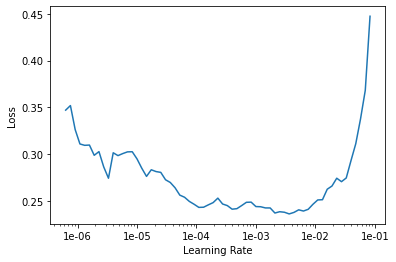

In [ ]:
learn.recorder.plot()

In [ ]:

learn.fit_one_cycle(3, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,0.255754,0.211752,0.924089,0.075911,0.924393,0.925025,0.923787,00:55
1,0.229622,0.193675,0.931174,0.068826,0.932671,0.931244,0.931530,00:56
2,0.205300,0.197143,0.928138,0.071862,0.927851,0.928687,0.928520,00:55


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,0.194657,0.185346,0.926113,0.073887,0.927982,0.925338,0.924714,00:55
1,0.207343,0.190732,0.929150,0.070850,0.929937,0.929104,0.929270,00:55
2,0.185933,0.177275,0.935223,0.064777,0.935345,0.935361,0.935358,00:55


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
lr = 1e-3/2
learn.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,0.223831,0.202287,0.940283,0.059717,0.940367,0.941492,0.940629,00:55
1,0.168825,0.174472,0.946356,0.053644,0.946391,0.947685,0.947425,00:55


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,0.135032,0.136821,0.958502,0.041498,0.958540,0.958802,0.958421,00:54
1,0.116197,0.149558,0.951417,0.048583,0.951874,0.952445,0.952331,00:54
2,0.088143,0.136209,0.951417,0.048583,0.951604,0.953082,0.952786,00:53


/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.save('/content/drive/MyDrive/Datasets/folfol/models/D1.2')

In [ ]:
torch.save(learn.model.state_dict(), "/content/drive/MyDrive/Datasets/folfol/model/DL")

In [ ]:
!pip3 install tensorflow

In [ ]:
!pip3 install keras
!pip3 install h5py

In [ ]:

import torch
import torch.nn as nn
from torch.autograd import Variable
import keras.backend as K
from keras.models import *
from keras.layers import *

import torch
from torchvision.models import squeezenet1_1


class PytorchToKeras(object):
    def __init__(self,pModel,kModel):
        super(PytorchToKeras,self)
        self.__source_layers = []
        self.__target_layers = []
        self.pModel = pModel
        self.kModel = kModel

        K.set_learning_phase(0)

    def __retrieve_k_layers(self):

        for i,layer in enumerate(self.kModel.layers):
            if len(layer.weights) > 0:
                self.__target_layers.append(i)

    def __retrieve_p_layers(self,input_size):

        input = torch.randn(input_size)

        input = Variable(input.unsqueeze(0))

        hooks = []

        def add_hooks(module):

            def hook(module, input, output):
                if hasattr(module,"weight"):
                    self.__source_layers.append(module)

            if not isinstance(module, nn.ModuleList) and not isinstance(module,nn.Sequential) and module != self.pModel:
                hooks.append(module.register_forward_hook(hook))

        self.pModel.apply(add_hooks)


        self.pModel(input)
        for hook in hooks:
            hook.remove()

    def convert(self,input_size):
        self.__retrieve_k_layers()
        self.__retrieve_p_layers(input_size)

        for i,(source_layer,target_layer) in enumerate(zip(self.__source_layers,self.__target_layers)):

            weight_size = len(source_layer.weight.data.size())

            transpose_dims = []

            for i in range(weight_size):
                transpose_dims.append(weight_size - i - 1)

            self.kModel.layers[target_layer].set_weights([source_layer.weight.data.numpy().transpose(transpose_dims), source_layer.bias.data.numpy()])

    def save_model(self,output_file):
        self.kModel.save(output_file)
    def save_weights(self,output_file):
        self.kModel.save_weights(output_file)



"""
We explicitly redefine the Squeezent architecture since Keras has no predefined Squeezent
"""

def squeezenet_fire_module(input, input_channel_small=16, input_channel_large=64):

    channel_axis = 3

    input = Conv2D(input_channel_small, (1,1), padding="valid" )(input)
    input = Activation("relu")(input)

    input_branch_1 = Conv2D(input_channel_large, (1,1), padding="valid" )(input)
    input_branch_1 = Activation("relu")(input_branch_1)

    input_branch_2 = Conv2D(input_channel_large, (3, 3), padding="same")(input)
    input_branch_2 = Activation("relu")(input_branch_2)

    input = concatenate([input_branch_1, input_branch_2], axis=channel_axis)

    return input


def SqueezeNet(input_shape=(224,224,3)):



    image_input = Input(shape=input_shape)


    network = Conv2D(64, (3,3), strides=(2,2), padding="valid")(image_input)
    network = Activation("relu")(network)
    network = MaxPool2D( pool_size=(3,3) , strides=(2,2))(network)

    network = squeezenet_fire_module(input=network, input_channel_small=16, input_channel_large=64)
    network = squeezenet_fire_module(input=network, input_channel_small=16, input_channel_large=64)
    network = MaxPool2D(pool_size=(3,3), strides=(2,2))(network)

    network = squeezenet_fire_module(input=network, input_channel_small=32, input_channel_large=128)
    network = squeezenet_fire_module(input=network, input_channel_small=32, input_channel_large=128)
    network = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(network)

    network = squeezenet_fire_module(input=network, input_channel_small=48, input_channel_large=192)
    network = squeezenet_fire_module(input=network, input_channel_small=48, input_channel_large=192)
    network = squeezenet_fire_module(input=network, input_channel_small=64, input_channel_large=256)
    network = squeezenet_fire_module(input=network, input_channel_small=64, input_channel_large=256)

    #Remove layers like Dropout and BatchNormalization, they are only needed in training
    #network = Dropout(0.5)(network)

    network = Conv2D(1000, kernel_size=(1,1), padding="valid", name="last_conv")(network)
    network = Activation("relu")(network)

    network = GlobalAvgPool2D()(network)
    network = Activation("softmax",name="output")(network)


    input_image = image_input
    model = Model(inputs=input_image, outputs=network)

    return model


keras_model = SqueezeNet()


#Lucky for us, PyTorch includes a predefined Squeezenet
pytorch_model = squeezenet1_1()

#Load the pretrained model
pytorch_model.load_state_dict(torch.load("/content/drive/MyDrive/Datasets/folfol/model/DL"))

#Time to transfer weights

converter = PytorchToKeras(pytorch_model,keras_model)
converter.convert((3,224,224))

#Save the weights of the converted keras model for later use
converter.save_weights("squeezenet.h5")



In [ ]:
pip install torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pytorch
!pip install torchvision

  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-oll51mjs/pytorch_c7b1f0e33c604079a99cdf9a3ed13f19/setup.py'"'"'; __file__='"'"'/tmp/pip-install-oll51mjs/pytorch_c7b1f0e33c604079a99cdf9a3ed13f19/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-mrzf4su8/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.


In [ ]:
!pip install tensorflow
!pip install tensorflow-addons
!git clone https://github.com/onnx/onnx-tensorflow.git && cd onnx-tensorflow && pip install -e . 

     |████████████████████████████████| 462 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
Cloning into 'onnx-tensorflow'...
remote: Enumerating objects: 6466, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 6466 (delta 270), reused 290 (delta 187), pack-reused 6051
Receiving objects: 100% (6466/6466), 2.02 MiB | 21.15 MiB/s, done.
Resolving deltas: 100% (4995/4995), done.
Obtaining file:///content/onnx-tensorflow
     |████████████████████████████████| 12.8 MB 5.1 MB/s 
  Running setup.py develop for onnx-tf


In [ ]:
!pip install onnx_tf

In [ ]:
# Some standard imports
import io
import numpy as np

from torch import nn
import torch.utils.model_zoo as model_zoo
import torch.onnx

In [ ]:
# Super Resolution model definition in PyTorch
import torch.nn as nn
import torch.nn.init as init


class SuperResolutionNet(nn.Module):
    def __init__(self, upscale_factor, inplace=False):
        super(SuperResolutionNet, self).__init__()

        self.relu = nn.ReLU(inplace=inplace)
        self.conv1 = nn.Conv2d(1, 64, (5, 5), (1, 1), (2, 2))
        self.conv2 = nn.Conv2d(64, 64, (3, 3), (1, 1), (1, 1))
        self.conv3 = nn.Conv2d(64, 32, (3, 3), (1, 1), (1, 1))
        self.conv4 = nn.Conv2d(32, upscale_factor ** 2, (3, 3), (1, 1), (1, 1))
        self.pixel_shuffle = nn.PixelShuffle(upscale_factor)

        self._initialize_weights()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pixel_shuffle(self.conv4(x))
        return x

    def _initialize_weights(self):
        init.orthogonal_(self.conv1.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv2.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv3.weight, init.calculate_gain('relu'))
        init.orthogonal_(self.conv4.weight)

# Create the super-resolution model by using the above model definition.
torch_model = SuperResolutionNet(upscale_factor=3)

In [ ]:
# Load pretrained model weights
model_url = '/content/drive/MyDrive/Datasets/folfol/model/DL'
batch_size = 1    # just a random number

# Initialize model with the pretrained weights
map_location = lambda storage, loc: storage
if torch.cuda.is_available():
    map_location = None
torch_model.load_state_dict(model_zoo.load_url(model_url, map_location=map_location))

# set the model to inference mode
torch_model.eval()

Downloading: "/content/drive/MyDrive/Datasets/folfol/model/DL" to /root/.cache/torch/hub/checkpoints/DL


ValueError: ignored